Dataset carregado com sucesso!

Dados divididos em 5686 amostras de treino e 2438 amostras de teste.

Iniciando a busca pelos melhores hiperparâmetros com GridSearchCV...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Melhores hiperparâmetros encontrados: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Acurácia do modelo SVM no conjunto de teste: 0.9840

--- Análise da Matriz de Confusão ---
Verdadeiros Positivos (TP - Venenosos corretamente classificados): 1142
Falsos Positivos (FP - Comestíveis incorretamente classificados como venenosos): 0
Verdadeiros Negativos (TN - Comestíveis corretamente classificados): 1257
Falsos Negativos (FN - Venenosos incorretamente classificados como comestíveis): 39
--------------------------------------


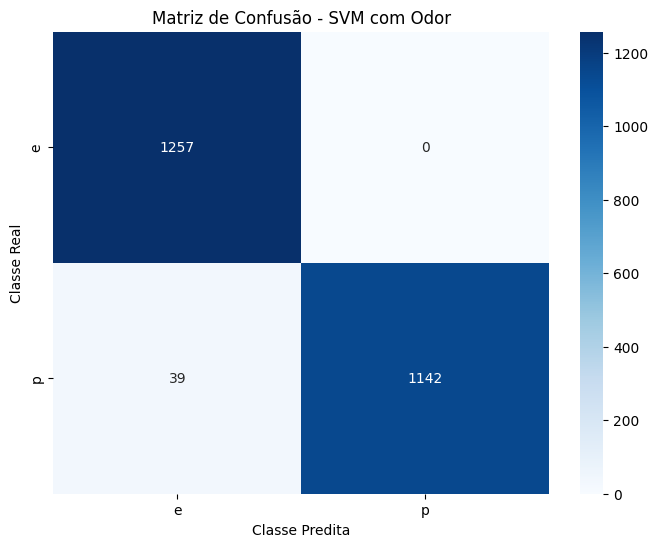

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


try:
    df = pd.read_csv('mushroom_s1_odor_ohe(in).csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'mushroom_s1_odor_ohe(in).csv' não foi encontrado.")
    print("Por favor, faça o upload do arquivo para o ambiente do Google Colab.")
    exit()


# Separar as features (características, X) do alvo (classe, y)
X = df.drop('class', axis=1)
y = df['class']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
print(f"\nDados divididos em {len(X_train)} amostras de treino e {len(X_test)} amostras de teste.")


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm_classifier = SVC()
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
print("\nIniciando a busca pelos melhores hiperparâmetros com GridSearchCV...")
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print(f"\nMelhores hiperparâmetros encontrados: {grid_search.best_params_}")
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo SVM no conjunto de teste: {accuracy:.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)

# TN (Verdadeiro Negativo), FP (Falso Positivo)
# FN (Falso Negativo), TP (Verdadeiro Positivo)
tn, fp, fn, tp = conf_matrix.ravel()

print("\n--- Análise da Matriz de Confusão ---")
print(f"Verdadeiros Positivos (TP - Venenosos corretamente classificados): {tp}")
print(f"Falsos Positivos (FP - Comestíveis incorretamente classificados como venenosos): {fp}")
print(f"Verdadeiros Negativos (TN - Comestíveis corretamente classificados): {tn}")
print(f"Falsos Negativos (FN - Venenosos incorretamente classificados como comestíveis): {fn}")
print("--------------------------------------")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Títulos e rótulos para maior clareza
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão - SVM com Odor')
plt.show()

-----

# Análise de Cogumelos com SVM: Classificação por Odor

Este notebook tem como objetivo construir e avaliar um modelo de Machine Learning para classificar cogumelos como **comestíveis** (`e`) ou **venenosos** (`p`) utilizando apenas uma característica: o seu **odor**.

Para isso, usaremos um classificador do tipo **Máquina de Vetores de Suporte (Support Vector Machine - SVM)** e otimizaremos seus parâmetros com a técnica de **GridSearchCV**.

-----

### Seção 1: Importação das Bibliotecas

O primeiro passo é importar todas as ferramentas (bibliotecas) que precisaremos para a análise.

```python
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
```

  * **`pandas`**: Essencial para carregar e manipular os dados em um formato de tabela chamado DataFrame.
  * **`scikit-learn (`sklearn`)`**: A principal biblioteca de Machine Learning em Python.
      * `train_test_split`: Função para dividir nossos dados em um conjunto para treinar o modelo e outro para testá-lo.
      * `GridSearchCV`: Ferramenta para testar várias combinações de parâmetros e encontrar a melhor para o nosso modelo.
      * `SVC`: A implementação do classificador SVM.
      * `accuracy_score`, `confusion_matrix`: Métricas para avaliar o quão bem nosso modelo está performando.
      * `LabelEncoder`: Usado para transformar rótulos de texto (como 'p' e 'e') em números, que é o formato que o modelo entende.
  * **`seaborn`** e **`matplotlib.pyplot`**: Bibliotecas para criar visualizações gráficas, como o mapa de calor da matriz de confusão.

-----

### Seção 2: Carregamento e Preparação dos Dados

Nesta etapa, carregamos o arquivo `csv` e preparamos os dados para o treinamento.

```python
# Tenta carregar o arquivo CSV
try:
    df = pd.read_csv('mushroom_s1_odor_ohe(in).csv')
    print("Dataset carregado com sucesso!")
# Se o arquivo não for encontrado, exibe uma mensagem de erro
except FileNotFoundError:
    print("Erro: O arquivo 'mushroom_s1_odor_ohe(in).csv' não foi encontrado.")
    exit()

# Separa as colunas de características (X) da coluna alvo (y)
X = df.drop('class', axis=1)
y = df['class']

# Converte a coluna 'class' de texto para números (e=0, p=1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Divide os dados: 70% para treino, 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
```

1.  **Leitura do CSV**: O código carrega os dados do arquivo `mushroom_s1_odor_ohe(in).csv`. Um bloco `try-except` garante que o programa avise o usuário caso o arquivo não seja encontrado.
2.  **Separação de Features e Alvo**:
      * **`X`**: Contém todas as colunas de características (os diferentes tipos de odores).
      * **`y`**: Contém apenas a coluna que queremos prever (`class`).
3.  **Codificação do Alvo (`LabelEncoder`)**: O modelo SVM trabalha com números, não com texto. O `LabelEncoder` converte as classes 'e' e 'p' para `0` e `1`, respectivamente.
4.  **Divisão em Treino e Teste**: Os dados são divididos em dois conjuntos. O **conjunto de treino** é usado para ensinar o modelo, e o **conjunto de teste** é usado para avaliar seu desempenho em dados que ele nunca viu antes, simulando uma situação real.

-----

### Seção 3: Treinamento e Otimização do Modelo

Aqui, configuramos o classificador SVM e usamos o `GridSearchCV` para encontrar a melhor combinação de hiperparâmetros.

```python
# Define um dicionário com os hiperparâmetros a serem testados
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Cria o classificador SVM e o GridSearchCV
svm_classifier = SVC()
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Inicia o treinamento
grid_search.fit(X_train, y_train)
```

  * **`param_grid`**: É um "dicionário de busca". Ele define quais valores para os hiperparâmetros `C`, `gamma` e `kernel` o `GridSearchCV` deve testar.
  * **`GridSearchCV`**: Funciona como um "gerente de treinamento". Ele pega o modelo SVM e o treina repetidamente com cada combinação de parâmetros do `param_grid`, usando validação cruzada (`cv=5`) para garantir que os resultados sejam consistentes. Ao final, ele identifica qual combinação gerou o melhor desempenho.
  * **`grid_search.fit(X_train, y_train)`**: Este é o comando que inicia todo o processo de treinamento e busca.

-----

### Seção 4: Avaliação do Desempenho

Após o treinamento, avaliamos a performance do melhor modelo encontrado no conjunto de teste.

```python
# Pega o melhor modelo encontrado pelo GridSearchCV
best_svm_model = grid_search.best_estimator_

# Faz as previsões no conjunto de teste
y_pred = best_svm_model.predict(X_test)

# Calcula a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

# Calcula a matriz de confusão e extrai os valores
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Imprime os resultados da matriz de confusão
print(f"Verdadeiros Positivos (TP): {tp}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Verdadeiros Negativos (TN): {tn}")
print(f"Falsos Negativos (FN): {fn}")
```

  * **Acurácia**: Mede a porcentagem de previsões corretas que o modelo fez no total. Uma acurácia de `0.99` significa que 99% dos cogumelos do conjunto de teste foram classificados corretamente.
  * **Matriz de Confusão**: Oferece uma análise mais profunda dos erros e acertos:
      * **Verdadeiros Positivos (TP)**: Cogumelos venenosos que o modelo acertou como venenosos.
      * **Verdadeiros Negativos (TN)**: Cogumelos comestíveis que o modelo acertou como comestíveis.
      * **Falsos Positivos (FP)**: Cogumelos comestíveis que o modelo errou, classificando como venenosos.
      * **Falsos Negativos (FN)**: Cogumelos venenosos que o modelo errou, classificando como comestíveis. Este é o erro mais perigoso\!

-----

### Seção 5: Visualização dos Resultados

Finalmente, criamos um gráfico para visualizar a matriz de confusão de forma mais intuitiva.

```python
# Cria um mapa de calor para a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Adiciona títulos e rótulos
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão - SVM com Odor')
plt.show()
```

  * Este código usa a biblioteca `seaborn` para desenhar um **heatmap** (mapa de calor). Os quadrados da diagonal principal (de cima para a esquerda até baixo para a direita) mostram os acertos, enquanto os outros quadrados mostram os erros. A anotação (`annot=True`) coloca os números diretamente no gráfico, facilitando a interpretação.